# Analyzing the results of a grid search from the best and worst seed for DeepAR on the electricity data-set

In [1]:
import os
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src.metrics import *

### Load data

In [2]:
def load_seed(path, seed_num):
    folders = [folder for folder in os.listdir(path) if folder.startswith(f"seed{seed_num}")]
    repetitions = {i: None for i in range(len(folders))}

    for folder in folders:
        folder_split = re.split("(\d+)", folder)
        folder_seed = int(folder_split[1])
        rep_num = int(folder_split[-2])
        
        if seed_num != folder_seed:
            continue
        
        if os.path.exists(f"{path}/{folder}/metrics.csv"):
            repetitions[rep_num] = pd.read_csv(f"{path}/{folder}/metrics.csv", index_col=0).rename_axis("index")

    return repetitions

In [3]:
path = "/home/dev/deepts/experiments/deep_ar/electricity/hps"
good_seed = 30
bad_seed = 97

good_reps = load_seed(path, good_seed)
good_reps_len = len(good_reps.keys())

bad_reps = load_seed(path, bad_seed)
bad_reps_len = len(bad_reps.keys())

In [4]:
good_reps_list = [v for k, v in good_reps.items() if v is not None]
good_reps_failed_idx = [k for k, v in good_reps.items() if v is None]

bad_reps_list = [v for k, v in bad_reps.items() if v is not None]
bad_reps_failed_idx = [k for k, v in bad_reps.items() if v is None]

len(good_reps_list), len(bad_reps_list), len(good_reps_failed_idx), len(bad_reps_failed_idx)

(126, 120, 18, 24)

In [5]:
metric = ["MAPE"]

In [6]:
good_exp_array = calculate_timeseries_means(good_reps_list, metric, 321)
good_exp_array.shape

(126, 321, 1)

In [7]:
bad_exp_array = calculate_timeseries_means(bad_reps_list, metric, 321)
bad_exp_array.shape

(120, 321, 1)

In [8]:
n = 50

### Good seed

(array([  0.,   0.,   0.,   0., 320., 321.,   0.,   0.,   0.,   0.,   0.,
          0., 321., 321.,   0.,   0.,   0.,   0.,   0.,   0., 318., 320.,
          0.,   0., 312., 321., 321., 314., 321., 319., 321., 317., 321.,
        321., 315., 313., 316., 320., 321., 316., 318., 319., 316., 307.,
        318., 297., 280., 307., 118., 317., 235., 213., 256., 109., 221.,
        156., 180., 166., 213.,  79., 174.,  46., 166., 283.,  37., 102.,
         65.,  32.,  25.,  14., 140.,  89., 251., 311., 294.,  12., 222.,
         18.,  39.,  37., 312., 312.,  11.,  20., 158.,  14.,   7.,   6.,
          5.,  10.,   5.,  16.,  35.,  17.,  10., 106., 270., 168., 268.,
        140., 269., 158., 282., 285., 165.,  43., 203.,  81., 145., 296.,
        163.,  36.,  39.,  12.,  82.,  11.,  23.,   8.,  23., 101., 319.,
        319., 319., 319., 318., 318., 318., 319., 318., 317., 318., 317.,
        318., 317., 318., 316., 179.,  18., 169.,  68., 238.,  14., 187.,
         28.]),
 array([26, 30, 25, 12

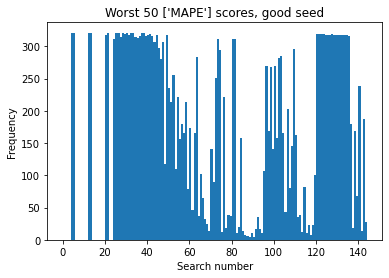

In [9]:
good_indexes_worst10, good_worst10 = np.unique(np.argsort(good_exp_array, axis=0)[n:], return_counts=True)
good_worst_10_count = count_repetitions_among_top_n(good_indexes_worst10, good_worst10, good_reps_len)

good_worst_10_count = list(good_worst_10_count)
for idx in good_reps_failed_idx:
    good_worst_10_count.insert(idx, 0)
    if len(good_worst_10_count) >= good_reps_len:
        good_worst_10_count.pop(-1)

good_worst_10_count = np.array(good_worst_10_count)

plt.title(f"Worst {n} {metric} scores, good seed")
plt.xlabel("Search number")
plt.ylabel("Frequency")

plt.hist([i for i in range(good_reps_len)], bins=good_reps_len, range=(0, good_reps_len), weights=good_worst_10_count)

good_worst_10_count, np.argsort(good_worst_10_count)[-10:][::-1], good_worst_10_count[np.argsort(good_worst_10_count)[-10:][::-1]]

(array([  0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   1.,
          0.,   0.,   9.,   0.,   0.,   7.,   0.,   2.,   0.,   4.,   0.,
          0.,   6.,   8.,   5.,   1.,   0.,   5.,   3.,   2.,   5.,  14.,
          3.,  24.,  41.,  14., 203.,   4.,  86., 108.,  65., 212., 100.,
        165., 141., 155., 108., 242., 147., 275., 155.,  38., 284., 219.,
        256., 289., 296., 307., 181., 232.,  70.,  10.,  27., 309.,  99.,
        303., 282., 284.,   9.,   9., 310., 301., 163., 307., 314., 315.,
        316., 311., 316., 305., 286., 304., 311., 215.,  51., 153.,  53.,
        181.,  52., 163.,  39.,  36., 156., 278., 118., 240., 176.,  25.,
        158., 285., 282., 309., 239., 310., 298., 313., 298., 220.,   2.,
          2.,   2.,   2.,   3.,   3.,   3.,   2.,   3.,   4.,   3.,   4.,
          3.,   4.,   3.,   5., 142., 303., 152., 253.,  83., 307., 134.,
        293.]),
 array([ 88,  90,  87,

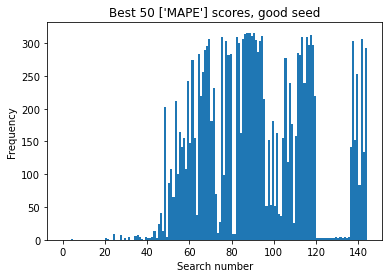

In [10]:
good_indexes_best10, good_best10 = np.unique(np.argsort(good_exp_array, axis=0)[:n], return_counts=True)
good_best_10_count = count_repetitions_among_top_n(good_indexes_best10, good_best10, good_reps_len)

good_best_10_count = list(good_best_10_count)
for idx in good_reps_failed_idx:
    good_best_10_count.insert(idx, 0)
    if len(good_best_10_count) >= good_reps_len:
        good_best_10_count.pop(-1)

good_best_10_count = np.array(good_best_10_count)


plt.title(f"Best {n} {metric} scores, good seed")
plt.xlabel("Search number")
plt.ylabel("Frequency")

plt.hist([i for i in range(good_reps_len)], bins=good_reps_len, range=(0, good_reps_len), weights=good_best_10_count)

good_best_10_count, np.argsort(good_best_10_count)[-10:][::-1], good_best_10_count[np.argsort(good_best_10_count)[-10:][::-1]]

### Bad seed

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 320., 317., 315., 317., 321., 319., 313., 318., 321.,
        315., 321., 315., 321., 318., 316., 318., 290., 310., 305., 311.,
        136., 132., 287., 312.,  56.,  24., 122., 284., 197.,  81., 286.,
        255.,  45.,   6., 285.,  25.,  80.,  78.,  41.,   6.,  21.,   7.,
         11.,  11.,   8.,  11.,  18.,   4., 214.,   2., 243., 189.,   2.,
        176., 285.,  23.,   4.,   6., 304.,  43.,   0.,   0.,   1.,   1.,
          3.,   2.,   5.,  18.,   2.,   2.,   2.,   5.,  20., 222.,  92.,
          9., 172.,   1.,  78.,  33.,  20.,   0.,  66.,  19.,   1.,  14.,
         33.,   1.,   3.,   3.,   2.,   2.,   0.,   4.,   1.,   2., 315.,
        310., 315., 310., 315., 308., 315., 314., 310., 230., 310., 214.,
        308., 230., 314.,  93.,  30.,   3.,  20.,   3.,   6.,   7.,   4.,
          6.]),
 array([34, 36, 28, 32

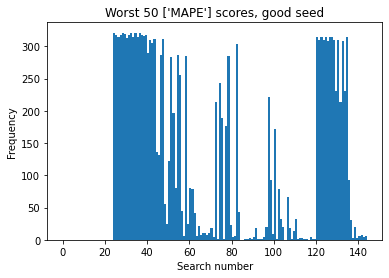

In [11]:
bad_indexes_worst10, bad_worst10 = np.unique(np.argsort(bad_exp_array, axis=0)[-n:], return_counts=True)
bad_worst_10_count = count_repetitions_among_top_n(bad_indexes_worst10, bad_worst10, bad_reps_len)

bad_worst_10_count = list(bad_worst_10_count)
for idx in bad_reps_failed_idx:
    bad_worst_10_count.insert(idx, 0)
    if len(bad_worst_10_count) >= bad_reps_len:
        bad_worst_10_count.pop(-1)

bad_worst_10_count = np.array(bad_worst_10_count)

plt.title(f"Worst {n} {metric} scores, good seed")
plt.xlabel("Search number")
plt.ylabel("Frequency")

plt.hist([i for i in range(bad_reps_len)], bins=bad_reps_len, range=(0, bad_reps_len), weights=bad_worst_10_count)

bad_worst_10_count, np.argsort(bad_worst_10_count)[-10:][::-1], bad_worst_10_count[np.argsort(bad_worst_10_count)[-10:][::-1]]

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   4.,   5.,   2.,   0.,   1.,   4.,   2.,   0.,
          4.,   0.,   6.,   0.,   2.,   4.,   2.,   3.,   9.,   9.,   4.,
         23.,  49.,  12.,   2., 186., 228.,  84.,  13.,  61.,  98.,  25.,
         38., 205., 279.,  14., 152., 101., 103., 162., 304., 185., 296.,
        291., 293., 284., 287., 238., 315.,  45., 286.,  34.,  56., 285.,
         53.,  24., 186., 316., 301.,  10., 152., 308., 305., 272., 314.,
        309., 256., 306., 181., 306., 312., 309., 302., 143.,  35.,  30.,
        215.,  19., 223.,  36.,  85., 200., 308., 100., 214., 217., 101.,
         86., 295., 283., 305., 298., 299., 305., 240., 249., 295.,   3.,
          6.,   3.,   5.,   5.,   7.,   5.,   5.,   5.,   6.,   5.,  13.,
          7.,   8.,   5.,  32.,  63., 223., 213., 222., 247., 273., 202.,
        288.]),
 array([ 80,  71,  87,

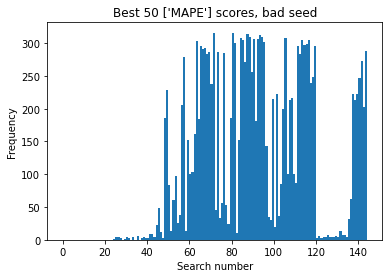

In [12]:
bad_indexes_best10, bad_best10 = np.unique(np.argsort(bad_exp_array, axis=0)[:n], return_counts=True)
bad_best_10_count = count_repetitions_among_top_n(bad_indexes_best10, bad_best10, bad_reps_len)

bad_best_10_count = list(bad_best_10_count)
for idx in bad_reps_failed_idx:
    bad_best_10_count.insert(idx, 0)
    if len(bad_worst_10_count) >= bad_reps_len:
        bad_best_10_count.pop(-1)

bad_best_10_count = np.array(bad_best_10_count)

plt.title(f"Best {n} {metric} scores, bad seed")
plt.xlabel("Search number")
plt.ylabel("Frequency")

plt.hist([i for i in range(bad_reps_len)], bins=bad_reps_len, range=(0, bad_reps_len), weights=bad_best_10_count)

bad_best_10_count, np.argsort(bad_best_10_count)[-10:][::-1], bad_best_10_count[np.argsort(bad_best_10_count)[-10:][::-1]]

### Combined plot of best/worst with good and bad seed

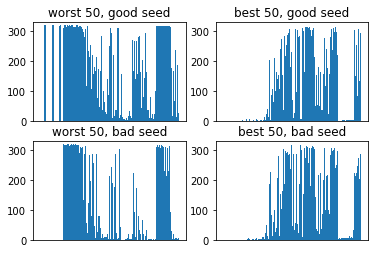

In [13]:
histograms = [good_worst_10_count, good_best_10_count, bad_worst_10_count, bad_best_10_count]
titles = [
    f"worst {n}, good seed",
    f"best {n}, good seed",
    f"worst {n}, bad seed",
    f"best {n}, bad seed"
]

for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.hist([i for i in range(bad_reps_len)], bins=bad_reps_len, range=(0, bad_reps_len), weights=histograms[i - 1])
    plt.ylim([0, 330])
    plt.xticks([])
    plt.title(titles[i - 1])


Looking at this we see that areas of hyperparameters seem to give similar performance for both the good and the bad seed.

### Where is the difference between the good and bad seed the largest or smallest?

In [14]:
def get_repetition_mean(exp_array, failed_idx):
    rep_means = exp_array.mean(axis=1).flatten()
    rep_means = list(rep_means)
    for idx in failed_idx:
        rep_means.insert(idx, np.nan)

    return np.array(rep_means)

In [15]:
good_rep_means = get_repetition_mean(good_exp_array, good_reps_failed_idx)
bad_rep_means = get_repetition_mean(bad_exp_array, bad_reps_failed_idx)

good_rep_means.shape, bad_rep_means.shape

((144,), (144,))

Quick sanity check. Are the means in our arrays the same as the ones in the file?

In [16]:
good_rep_means[82], pd.read_csv(path + "/seed30_82/metrics.csv")[metric].mean(), bad_rep_means[82], pd.read_csv(path + "/seed97_82/metrics.csv")[metric].mean()

(0.09771900729960478,
 MAPE    0.097719
 dtype: float64,
 0.2688170906400308,
 MAPE    0.268817
 dtype: float64)

Yes, they are

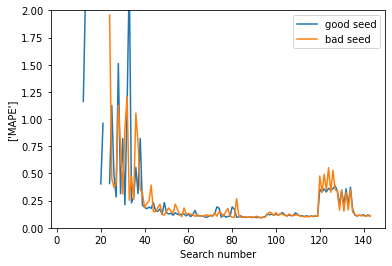

In [17]:
plt.plot(good_rep_means, label="good seed")
plt.plot(bad_rep_means, label="bad seed")
plt.ylim([0, 2])
plt.ylabel(f"{metric}")
plt.xlabel("Search number")

plt.legend()

Zoom on on hyperparameter configuration 82, this is the "default" parameters.

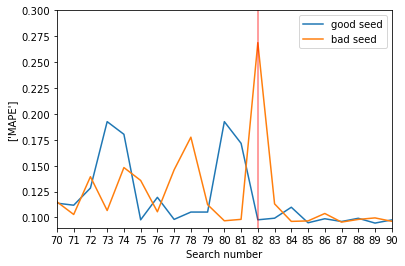

In [18]:
plt.plot(good_rep_means, label="good seed")
plt.plot(bad_rep_means, label="bad seed")
plt.ylim([0.09, 0.3])
plt.xlim([70, 90])
plt.xticks([i for i in range(70, 91)])
plt.axvline(82, color="r", alpha=0.5)
plt.ylabel(f"{metric}")
plt.xlabel("Search number")
plt.legend()

This plot shos that maybe we were unlucky and just happend to choose some hyperparameters where the difference is higher than normal

In [19]:
abs_diff_mean = np.abs(good_rep_means - bad_rep_means)

Text(0.5, 1.0, "Absolute difference between ['MAPE'] score")

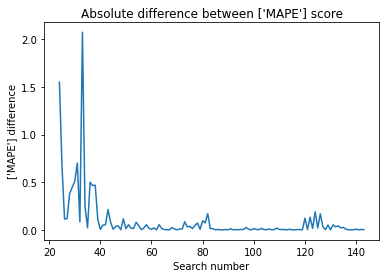

In [20]:
plt.plot(abs_diff_mean)
plt.ylabel(f"{metric} difference")
plt.xlabel("Search number")
plt.title(f"Absolute difference between {metric} score")

We know both seeds perform badly on the first 40 sets of hyperparameters tested, so we slice off those

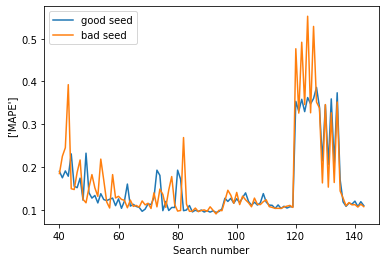

In [21]:
plt.plot(good_rep_means[40:], label="good seed")
plt.plot(bad_rep_means[40:], label="bad seed")
plt.xticks([0, 20, 40, 60, 80, 100], labels=[40, 60, 80, 100, 120, 140])
plt.ylabel(f"{metric}")
plt.xlabel("Search number")
plt.legend()

Text(0.5, 1.0, "Absolute difference between ['MAPE'] score")

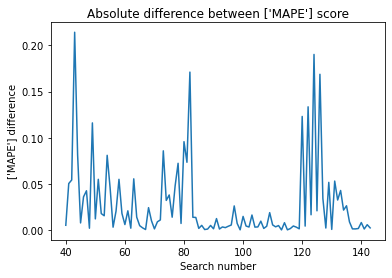

In [22]:
plt.plot(abs_diff_mean[40:])
plt.xticks([0, 20, 40, 60, 80, 100], labels=[40, 60, 80, 100, 120, 140])
plt.ylabel(f"{metric} difference")
plt.xlabel("Search number")
plt.title(f"Absolute difference between {metric} score")

Are there any hyperparameters that yields both a low difference for both seeds and a good score?

We create a mask for indexes where that shows where the difference is low, and the score for both seeds is good.

In [23]:
diff_mean = good_rep_means - bad_rep_means
nan_array = np.empty(abs_diff_mean.shape)
nan_array[:] = np.nan

Text(0.5, 1.0, 'Difference between good and bad seed < 0.01')

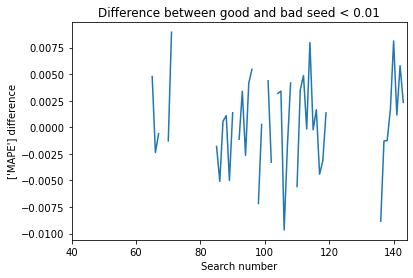

In [24]:
diff_epsilon = 0.01
plt.plot(np.where(abs_diff_mean < diff_epsilon, diff_mean, nan_array))
plt.xlim([40, 144])
plt.ylabel(f"{metric} difference")
plt.xlabel("Search number")
plt.title(f"Difference between good and bad seed < {diff_epsilon}")

Text(0.5, 1.0, "Average ['MAPE'] of good and bad seed < 0.2")

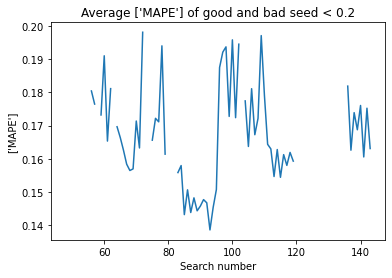

In [25]:
metric_epsilon = 0.2
avg_mape = good_rep_means + bad_rep_means / 2
plt.plot(np.where(avg_mape < metric_epsilon, avg_mape, nan_array))
plt.ylabel(f"{metric}")
plt.xlabel("Search number")
plt.title(f"Average {metric} of good and bad seed < {metric_epsilon}")

In [26]:
diff_mean_mask = np.where(abs_diff_mean < diff_epsilon, True, False)
avg_mape_mask = np.where(avg_mape < metric_epsilon, True, False)

mask = np.logical_and(diff_mean_mask, avg_mape_mask)
mask.shape


(144,)

In [27]:
masked_good_rep_means = np.where(mask == True, good_rep_means, nan_array)
masked_bad_rep_means = np.where(mask == True, bad_rep_means, nan_array)

Index of lowest score, good seed: 93
Index of masked lowest score, good seed: 93
Index of lowest score, bad seed: 93
Index of masked lowest score, bad seed: 93


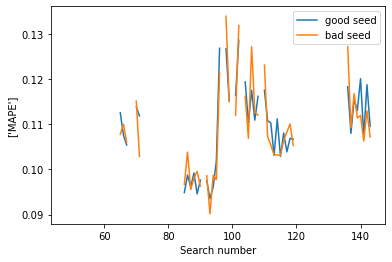

In [28]:
plt.plot(masked_good_rep_means, label="good seed")
plt.plot(masked_bad_rep_means, label="bad seed")
plt.ylabel(f"{metric}")
plt.xlabel("Search number")
plt.legend()

print(f"Index of lowest score, good seed: {np.nanargmin(good_rep_means)}")
try:
    print(f"Index of masked lowest score, good seed: {np.nanargmin(masked_good_rep_means)}")
except ValueError as e:
    print(f"No non-nan values in masked array. Error: {e}")

print(f"Index of lowest score, bad seed: {np.nanargmin(bad_rep_means)}")
try:
    print(f"Index of masked lowest score, bad seed: {np.nanargmin(masked_bad_rep_means)}")
except ValueError as e:
    print(f"No non-nan values in masked array: Error: {e}")

So the two seeds both perform the best with hyperparameter configuration number 93, and the difference between the scores is also low then. Conclusion: run an experiment with these hyperparameters.